In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time
import seaborn as sns

# Importation des fichiers

#### GRN_edges_S_cerevisiae.txt

In [3]:
edges=pd.read_csv("GRN_edges_S_cerevisiae.txt",header=0)
edges=edges.drop(columns=["Unnamed: 0"])
edges.head()

,transcription_factor,target_gene
0,G15,G1
1,G98,G1
2,G109,G1
3,G22,G9
4,G211,G11


#### net4 transcription factors.tsv

In [4]:
factors=pd.read_csv("net4_transcription_factors.tsv",header=0)
factors.head()

,transcription_factor
0,G1
1,G2
2,G3
3,G4
4,G5


#### net4 gene ids.tsv

In [5]:
geneIDS=pd.read_csv("net4_gene_ids.tsv",sep="\t",header=0)
geneIDS.head()

,ID,Name
0,G1,YHR084W
1,G2,YER109C
2,G3,YDR496C
3,G4,YBR098W
4,G5,YNL139C


####  go slim mapping.tab.txt

In [6]:
mapping=pd.read_csv("go_slim_mapping.tab.txt",sep="\t",header=0)
mapping.head()

,HRA1,HRA1.1,S000119380,C,cellular_component,GO:0005575,ncRNA_gene
0,HRA1,HRA1,S000119380,F,molecular_function,GO:0003674,ncRNA_gene
1,HRA1,HRA1,S000119380,P,rRNA processing,GO:0006364,ncRNA_gene
2,HRA1,HRA1,S000119380,P,ribosomal small subunit biogenesis,GO:0042274,ncRNA_gene
3,ICR1,ICR1,S000132612,C,nucleus,GO:0005634,ncRNA_gene
4,ICR1,ICR1,S000132612,F,molecular_function,GO:0003674,ncRNA_gene


# Représentations du graphe

## Graphe avec tous les gènes

In [45]:
GC=nx.from_pandas_dataframe(edges,'transcription_factor','target_gene',create_using=nx.DiGraph())

In [46]:
GC.add_nodes_from(geneIDS["ID"])
GC.add_nodes_from(factors['transcription_factor'])
print(nx.info(GC))

Name: 
Type: DiGraph
Number of nodes: 5950
Number of edges: 3940
Average in degree:   0.6622
Average out degree:   0.6622


In [47]:
nodecolor=list()
nodesize=list()
for node in list(GC.nodes) :
    if node in list(factors['transcription_factor']) :
        nodecolor.append('deeppink')
        nodesize.append(3000)
    else :
        nodecolor.append('cornflowerblue')
        nodesize.append(1500)

In [ ]:
plt.figure(figsize=(150,150))
nx.draw_networkx(GC, node_size=nodesize, with_labels=False, node_color=nodecolor,
                 arrowstyle='Fancy, head_length=.1,head_width=.4, tail_width=0.1')
plt.savefig("GC.png")

KeyboardInterrupt: 

## Graphe de la région régulatoire (centre connecté)

#### Répartition des facteurs de transcription

In [7]:
G=nx.from_pandas_dataframe(edges,'transcription_factor','target_gene',create_using=nx.DiGraph())
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 1994
Number of edges: 3940
Average in degree:   1.9759
Average out degree:   1.9759


In [8]:
nodecolor=list()
nodesize=list()
for node in list(G.nodes) :
    if node in list(edges['transcription_factor']) :
        nodecolor.append('deeppink')
        nodesize.append(3000)
    else :
        nodecolor.append('cornflowerblue')
        nodesize.append(1500)

In [ ]:
plt.figure(figsize=(150,150))
nx.draw_networkx(G, node_size=nodesize, with_labels=False, node_color=nodecolor,
                 arrowstyle='Fancy, head_length=.1,head_width=.4, tail_width=0.1')
plt.savefig("G.png")

In [ ]:
plt.figure(figsize=(200,200))
pos=nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(G,pos=pos, node_size=nodesize, with_labels=False, node_color=nodecolor,
                 arrowstyle='Fancy, head_length=.1,head_width=.4, tail_width=0.1')
plt.savefig("G_layout.png")

#### Matrice d'adjacence

In [ ]:
adjacence=nx.to_numpy_matrix(G)
sns.set_style("whitegrid")
plt.figure(figsize=(20,12))
plt.imshow(adjacence)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

On remarque que la matrice est creuse : il y a au final très peu de connexions entre les noeuds.

# Description du graphe

Certaines des mesures suivantes ne sont pas disponibles pour les graphes dirigés : nous utiliserons alors la version non dirigée de notre graphe.

In [9]:
GU=nx.to_undirected(G)

#### Diamètre et distance moyenne

Le graphe G n'est pas completement connecté : on a pu voir qu'il y avait 3 petits groupes de noeuds détachés du reste. Le diamètre du graphe est donc infini. On peut en revanche calculer le diamètre du plus gros sous-graphe connecté :

In [10]:
largest_cc_list = max(nx.connected_components(GU), key=len)
largest_cc=GU.subgraph(largest_cc_list)
print(nx.info(largest_cc))
d=nx.diameter(largest_cc)

Name: 
Type: SubGraph
Number of nodes: 1984
Number of edges: 3928
Average degree:   3.9597


In [11]:
print("diamètre = %d" %d)

diamètre = 9


#### Degrés des noeuds et Connectivité moyenne

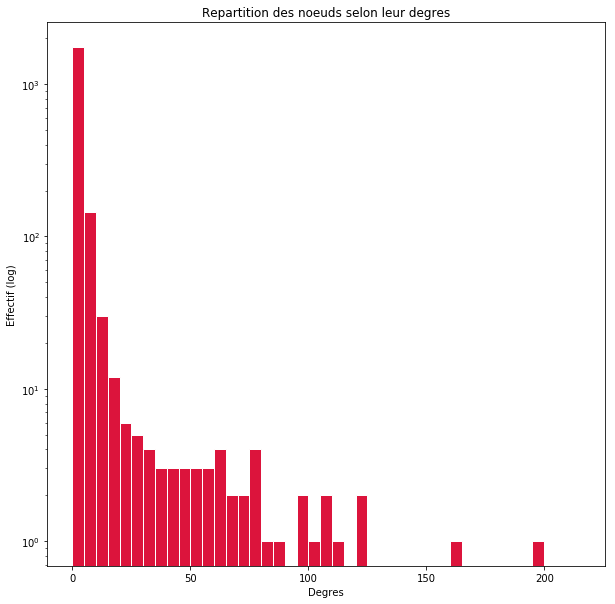

In [12]:
Deg=nx.degree(G)
degrees=[]
nodes=[]
for d in Deg:
    degrees.append(d[1])
    nodes.append(d[0])
plt.figure(figsize=(10,10))
breaks=range(0,220,5)
plt.hist(degrees,color="Crimson",log=True,bins=breaks,edgecolor = 'white')
plt.xlabel('Degres')
plt.ylabel('Effectif (log)')
plt.title('Repartition des noeuds selon leur degres')
plt.savefig("degres.png")

In [13]:
Deg=nx.degree(G)
trans_degrees=[]
gene_degrees=[]
for d in Deg:
    if d[0] in  list(edges['transcription_factor']) :
        trans_degrees.append(d[1])
    else :
        gene_degrees.append(d[1])

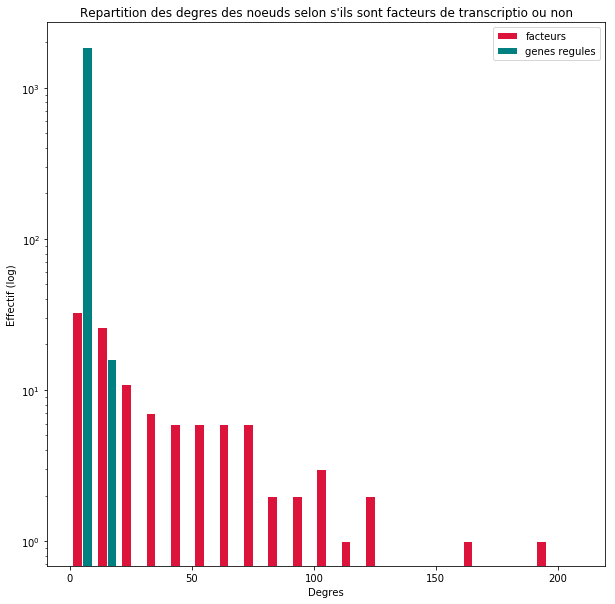

In [14]:
plt.figure(figsize=(10,10))
breaks=range(0,220,10)
plt.hist([trans_degrees,gene_degrees],color=["Crimson","teal"],
         log=True,bins=breaks,edgecolor = 'white',label = ['facteurs', 'genes regules'])
plt.xlabel('Degres')
plt.ylabel('Effectif (log)')
plt.legend()
plt.title("Repartition des degres des noeuds selon s'ils sont facteurs de transcription ou non")
plt.savefig("degres2.png")

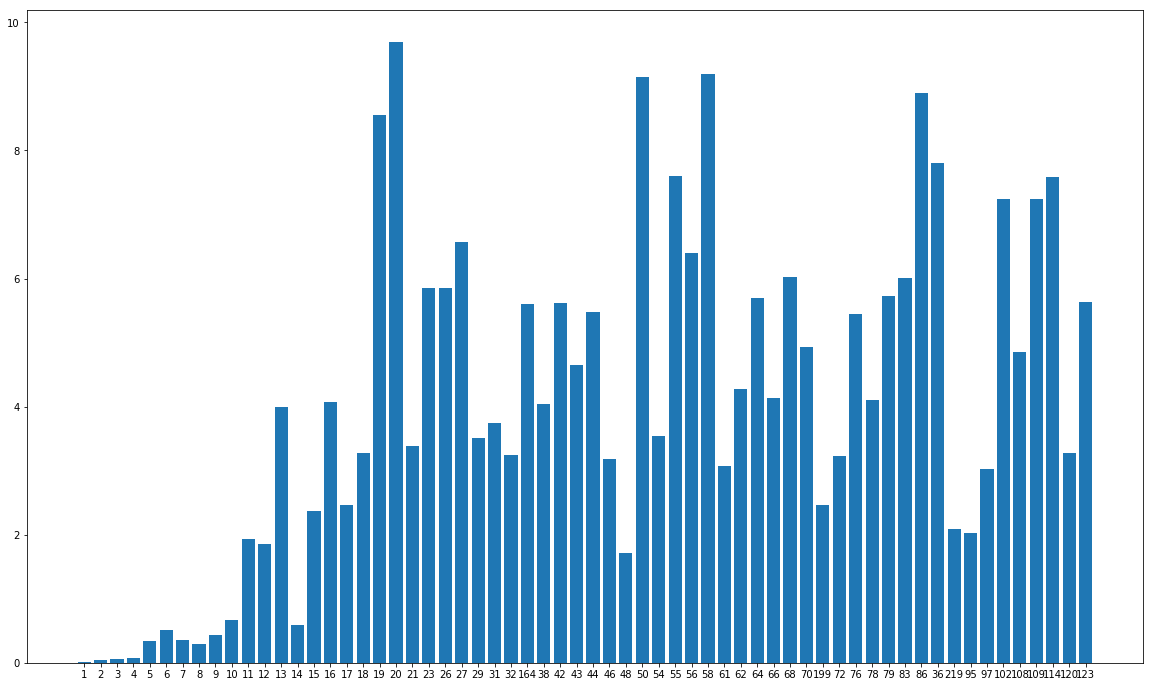

In [15]:
Connect=nx.average_degree_connectivity(G)
plt.figure(figsize=(20,12))
plt.bar(range(len(Connect)), list(Connect.values()), align='center')
plt.xticks(range(len(Connect)), list(Connect.keys()))
plt.show()
plt.savefig("connectivity.png")

#### Rich club coefficients

In [16]:
RC=nx.rich_club_coefficient(GU,normalized=False)

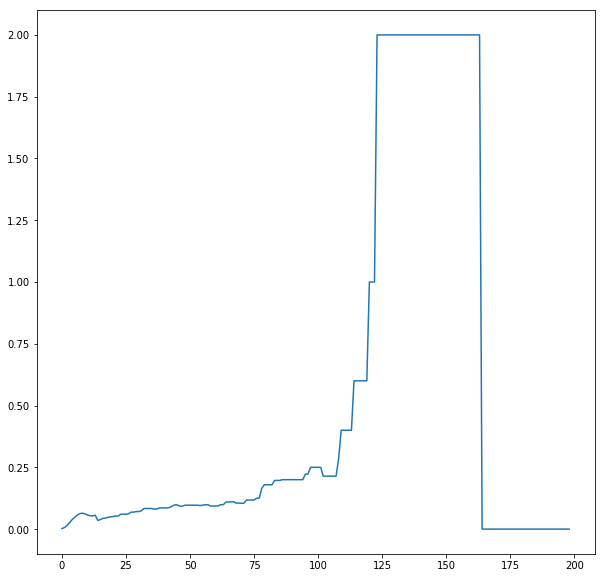

In [17]:
plt.figure(figsize=(10,10))
plt.plot(RC.keys(),RC.values())
plt.show()
plt.savefig("richclub.png")

In [18]:
def RichClub(G,k):
    liste = [] # liste vide des noeuds dans le rich club
    nodes=list(G.nodes())
    # on parcours le graphe, et pour chaque couple de noeud, on récupère la liste des voisins communs
    for i in nodes :
        if G.degree(i) > k :
            liste.append(i)
                        
    return G.subgraph(liste)

rich=RichClub(G,50)
print(len(list(rich.nodes())))

30


In [ ]:
nx.draw(rich,with_labels=True)
print(rich.nodes())

#### Densité

In [ ]:
print("Densité moyenne du graphe : %f" % nx.density(G))

#### Betweenness centrality

In [ ]:
BC=nx.betweenness_centrality(G)

In [ ]:
sns.boxplot(BC.values())
plt.savefig("betwcentr.png")

#### Coefficients de clustering (Local et Global)

In [ ]:
print("Coeficient de clustering global : %f" % nx.average_clustering(GU))
clust_coef=nx.clustering(GU)

In [ ]:
sns.boxplot(clust_coef.values())
plt.savefig("coefclust.png")

#### closeness centrality

In [ ]:
c=nx.closeness_centrality(G)

In [ ]:
closecolor=[]
for n in G :
    closecolor.append(c[n])

In [ ]:
plt.figure(figsize=(150,150))
pos=nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(G,pos=pos, node_size=1500, with_labels=False, node_color=closecolor, cmap='gnuplot2')
plt.savefig("G_closeness_layout.png")

# Algorithme de décomposition K-shell

In [ ]:
sous_graphes=list()
for k in range(max(degrees)) :
    sous_graphes.append(nx.k_shell(GU,k))
print(max(degrees))

In [ ]:
kshellcolor=list()
kshellsize=list()
for n in GU.nodes :
    for i in range(len(sous_graphes)) :
        if n in sous_graphes[i] :
            kshellcolor.append(i)
            kshellsize.append(1500*(i+1))

In [ ]:
plt.figure(figsize=(150,150))
pos=nx.nx_agraph.graphviz_layout(GU)
nx.draw_networkx(GU,pos=pos, node_size=kshellsize, with_labels=False, node_color=kshellcolor, cmap='gnuplot2')
plt.savefig("G_kshells_layout.png")

In [ ]:
def degree_list(G) :
    Deg=G.degree()
    degrees=[]
    for d in Deg:
        degrees.append(d[1])
    
    return degrees

In [ ]:
def kshell2(G,k) :
                    
    kshell=nx.Graph()
    sousgraphe=G.copy()
    degrees=degree_list(sousgraphe)
    for i in range(k) :
        degrees=degree_list(sousgraphe)
        if degrees :
            while min(degrees)<=i :
                asuppr=[]
                for n in sousgraphe.nodes() :
                    if sousgraphe.degree(n)<=i :
                        asuppr.append(n)
                sousgraphe.remove_nodes_from(asuppr)
                degrees=degree_list(sousgraphe)
                if not degrees :
                    break
     
    if degrees :
        while min(degrees)<=k :
            asuppr=[]
            for n in sousgraphe.nodes() :
                if sousgraphe.degree(n)<=k :
                    kshell.add_node(n)
                    asuppr.append(n)
            sousgraphe.remove_nodes_from(asuppr)
            degrees=degree_list(sousgraphe)
            if not degrees :
                break

    for node in kshell.nodes() :
        for neigh in G.neighbors(node) :
            if neigh in kshell :
                kshell.add_edge(node,neigh)
                
    return kshell

In [ ]:
def kshell_all(G) :
    
    kshells=[nx.Graph()]
    sousgraphe=G.copy()
    degrees=degree_list(sousgraphe)
    i=0
    while degrees :
        degrees=degree_list(sousgraphe)
        while min(degrees)<=i :
            asuppr=[]
            for n in sousgraphe.nodes() :
                if sousgraphe.degree(n)<=i :
                    asuppr.append(n)
                    kshells[i].add_node(n)
            sousgraphe.remove_nodes_from(asuppr)
            degrees=degree_list(sousgraphe)
            if not degrees :
                break
                
        for node in kshells[i].nodes() :
            for neigh in G.neighbors(node) :
                if neigh in kshells[i] :
                    kshells[i].add_edge(node,neigh)
     
        if degrees :
            kshells.append(nx.Graph())
            i+=1
            
                
    return kshells

In [ ]:
sous_graphes2=list()
for k in range(max(degrees)) :
    sous_graphes2.append(kshell2(GU,k))

In [ ]:
kshellcolor2=list()
kshellsize2=list()
for n in GU.nodes :
    for i in range(len(sous_graphes2)) :
        if n in sous_graphes2[i] :
            kshellcolor2.append(i)
            kshellsize2.append(1500*(i))
#print(str(len(kshellcolor2))+" "+str(len(kshellsize2))+" "+str(len(GU.nodes)))

In [ ]:
for i in range(len(sous_graphes)) :
        print(str(i)+" "+str(len(sous_graphes[i]))+" "+str(len(sous_graphes2[i])))

In [ ]:
plt.figure(figsize=(150,150))
pos=nx.nx_agraph.graphviz_layout(GU)
nx.draw_networkx(GU,pos=pos, node_size=kshellsize2, with_labels=False, node_color=kshellcolor2, cmap='gnuplot2')
plt.savefig("G_kshells_2_layout.png")

In [ ]:
sous_graphes3=kshell_all(GU)

In [ ]:
for sg in sous_graphes3 :
    print(len(sg))

# Complexité temporelle

In [ ]:
Grand=[]
for i in range(1,100) :
    n=100^(10*i)
    Grand.append(nx.gnm_random_graph(n,n*10))

RC=[]
temps=[]
for g in Grand :
    start_time=time.time()
    RC.append(nx.rich_club_coefficient(g,normalized=False))
    end_time=time.time()
    temps.append(end_time-start_time)

In [ ]:
for i in range(len(temps)) :
    print(temps[i])

In [ ]:
plt.figure(figsize=(20,20))
pos=nx.nx_agraph.graphviz_layout(sous_graphes3[2])
nx.draw_networkx(sous_graphes3[2],pos=pos,with_labels=False)
plt.savefig("G_kshells7_layout.png")